# Math for ML: Calculus and Optimization

In this part of the series on math for machine learning I'll focus on calculus and its most important application, optimization.

Calculus is essentially the study of the continuum. Important things that calculus seeks to understand are:
- Infinitesimals: How to manipulate numbers that are "infinitely" small.
- Limits: What happens when numbers get arbitrarily close to each other.
- Differentiation: How one variable changes continuously in response to one or more other variables. 
- Integration: How to add up infinitely many numbers to get a finite number, e.g. to calculate areas and volumes of things.

Not all of these topics are equally important to know for machine learning in my opinion. Most important to know is differentiation, and really not even all of that. Describing that differentiation is depends on infinitesimals, so we'll start there. Limits don't really show up. And integration is only useful to know conceptually, not in any kind of detail.

Once we discuss these topics we'll move to the most important application of calculus to machine learning, which is optimization. Optimization is the process of finding the "best" option in a sense. Knowing what this means is crucial to machine learning. We'll also define the important gradient descent algorithm, which is how models are typically trained.

Let's get started.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from utils import *

## Infinitesimals

Fundamental to the understanding of calculus is the idea of an "infinitely small" number, called an infinitesimal. An **infinitesimal** is a number that's not 0 but so close to being 0 that you can't really tell it isn't 0. These small numbers are often written in math with letters like $\varepsilon$ or $\delta$. Think of them as *very very* tiny numbers, so tiny their square is basically 0:
$$\varepsilon > 0, \quad \varepsilon^2 \approx 0.$$

But what does this even mean? Here it might be helpful to recall our discussion of floating point numbers. Recall that we can't get infinite precision. In python's double precision floating point we can only get down to about $5 \cdot 10^{-324}$, or `5e-324`. If the square of a small number has a value *smaller* than about `5e-324` we'd literally get `0.0` as far as python is concerned.

Just for fun let's look at the really tiny number $10^{-200}$, or `1e-200`. That's 200 decimal places of zeros before the 1 even shows up. Python thinks `1e-200` is just fine. But what happens if we square it? We should in theory get $10^{-400}$, or 400 decimal places of zeros followed by a 1. But as far as floating point is concerned, the square is zero.

In [2]:
epsilon = 1e-200
epsilon, epsilon ** 2

(1e-200, 0.0)

Of course, you could argue that we could just go to a higher precision then. Use more bits. But eventually, if we keep making `epsilon` small enough we'll hit a point where `epsilon ** 2 = 0.0`. Thus, if it makes you feel better, when you see an infinitesimal just think "`1e-200` in double precision".

**Aside:** In practice, when using infinitesimals on a computer we're more likely to use an `epsilon` like `1e-3` or `1e-5`. Yes, in those cases their square is definitely non-zero in python, but they turn out to be much more numerical friendly to work with. Working with really small numbers like `1e-200` will make calculations likely to underflow or overflow, or cause a loss of precision when subtracting two nearby numbers like `(1 + 1e-200) - 1`.

Infinitesimals are especially interesting when added to regular numbers. For example, consider some finite number $x$. It could be 2 or -100 or whatever you want. Suppose now we add to it an infinitesimal number $\varepsilon$. What's the square of this new nearby number $x+\varepsilon$? Expanding, we'd have
$$(x + \varepsilon)^2 = x^2 + 2x\varepsilon + \varepsilon^2.$$
But since $\varepsilon^2 \approx 0$,
$$(x + \varepsilon)^2 \approx x^2 + 2x\varepsilon.$$

Okay, but what does this mean? Well, I can reformulate the question as follows: "If I change $x$ by a little bit, how much does the function $y=x^2$ change"? If $x$ is nudged to a value close by of $x+\varepsilon$, then $y$ necessarily gets nudged to a new value $(x+\varepsilon)^2$. 

So how much does $y$ change? Call this change $\delta(x)$. Then we'd just have
$$\delta(x) = (x+\varepsilon)^2 - x^2 \approx 2x\varepsilon.$$
That is, if we change $x$ by a small amount $\varepsilon$, then $y$ itself changes by a small amount $\delta(x)=2x\varepsilon$. Interestingly, how much $y$ changes actually depends on which $x$ we pick. If $x=1$ then $y$ changes by $2\varepsilon$, just twice how much $x$ is nudged. If $x=1000$ though, then $y$ changes by $2000\varepsilon$, a much bigger change.

### Limits [Optional]
Pick some value $x=x_0$, say $x=2$. Observe that by setting $\varepsilon=0$ directly in the above calculation gives the result $y_0=f(x_0)=x_0^2$. That is, it essentially just evaluates the function $f(x)$ at $x_0^2$. This idea of "evaluating" a function $f(x)$ at a point $x_0$ by looking at $f(x_0+\varepsilon)$ and then setting $\varepsilon=0$ is called taking the **limit**. You can imagine this as making $\varepsilon$ smaller and smaller and smaller until you get the exact value of $f(x_0)=x_0^2$ at $x_0$. For technical reasons, when people do this they write
$$\lim_{x \rightarrow x_0} f(x) = f(x_0),$$
and say "the limit of $f(x)$ as $x$ approaches $x_0$ is $f(x_0)$". In my experience, limits don't really tend to show up in machine learning, so you really don't need to know this. Just for your own edification.

## Differentiation

### Motivation and Definition

When talking about things like "if we change $x$ a little bit, how much does $y$ change", we typically use a special notation to make it clear what is a small change of what. Instead of writing $\varepsilon$ we just write $dx$ to indicate "a little bit of $x$". Instead of writing $\delta(x)$ for "a little bit of $y$" we'd write $dy$. Note that both $dx$ and $dy$ are always infinitesimals, but their *ratio* is not as we'll see in a second. 

When using this $d$ notation, the values $dx$ and $dy$ are usually called **differentials**, which is where the term "differentiation" comes from. They're still infinitesimals, they just have another special name.

In this notation, we'd say "if $x$ changes to $x+dx$, then $y$ changes to $y+dy$ via the function $f(x+dx)$". The small change we're solving for is then just $dy$, the amount $y$ changes if $x$ is changed by $dx$:
$$y + dy = f(x+dx) = (x + dx)^2 = x^2 + 2xdx + dx^2 \approx 2xdx.$$
So $dy \approx 2xdx$, or re-writing just because I can,
$$\frac{dy}{dx} = 2x.$$

This ratio of differentials $\frac{dy}{dx}$ is called the **derivative** of the function $y=x^2$, usually just pronounced "dydx". The act of taking a derivative is called **differentiation**. Notice there's no infinitesimal ($dy$ or $dx$) on the right-hand side, hence the derivative is not a small number. In fact it's on the scale of $x$ in this case since the right-hand side is $2x$.

Let's try to calculate this derivative for a specific value of $x$, say $x=1$, by taking the smaller and smaller values of $dx$ and seeing what the results look like. To do this, I'll define a loop over some values of $dx$ and see what the predicted derivative is. The exact answer at $x=1$ should be 
$$\frac{dy}{dx}\bigg|_{x=1}=2(1)=2.$$ 
Read this expression as "the derivative of $y$ with respect to $x$ evaluated at $x=1$ is $2$". 

I'll also print out the error, which is the predicted value $2$ minus the calculated value. Smaller error is better, obviously.

In [3]:
f = lambda x: x ** 2 # the function we want to differentiate
x0 = 1 # the value of x to calculate the derivative at
dydx_exact = 2 * x0 # the exact value of the derivative (if you have it)
for dx in [1, 0.1, 0.01, 0.001, 1e-4, 1e-5, 1e-10, 1e-100, 1e-200]:
    dydx1 = (f(x0 + dx) - f(x0)) / dx
    error = dydx1 - dydx_exact
    print(f'dx = {dx:8.16f} \t dy/dx = {dydx1:4f} \t error = {error:4f}')

dx = 1.0000000000000000 	 dy/dx = 3.000000 	 error = 1.000000
dx = 0.1000000000000000 	 dy/dx = 2.100000 	 error = 0.100000
dx = 0.0100000000000000 	 dy/dx = 2.010000 	 error = 0.010000
dx = 0.0010000000000000 	 dy/dx = 2.001000 	 error = 0.001000
dx = 0.0001000000000000 	 dy/dx = 2.000100 	 error = 0.000100
dx = 0.0000100000000000 	 dy/dx = 2.000010 	 error = 0.000010
dx = 0.0000000001000000 	 dy/dx = 2.000000 	 error = 0.000000
dx = 0.0000000000000000 	 dy/dx = 0.000000 	 error = -2.000000
dx = 0.0000000000000000 	 dy/dx = 0.000000 	 error = -2.000000


Starting with `dx=1` is a bad choice with a huge error of `1.0`. We're way off. Shrinking to `dx=0.1` puts us in the ball park with a value `dydx = 2.1`. You can see that making `dx` successively smaller and smaller makes the error successively smaller, in this case by a factor of 10 each time. We see the error getting smaller all the way down to about `dx=1e-10` before creeping up again as we make `dx` even smaller than that. This is due to the numerical roundoff of floating point numbers. We're subtracting two numbers `f(x0 + dx) - f(x0)` that are very close to each other when `dx` is really small, which as you'll recall is one of the pitfalls to avoid when working with floating point numbers. Feel free to play with different functions and values to get a feel for what's going on.

This method we just used to calculate the derivative is essentially exactly how derivatives are usually calculated on a computer. We choose a small value of `dx` and just apply the formula above, with some minor tweaks to get better accuracy in fewer steps. 

The process of calculating the derivative this way, directly from its definition essentially, is called **numerical differentiation**. This is how derivatives are usually calculated in most fields. This contrasts with how we'll usually calculate them in machine learning, which uses a technique called **autodifferentiation**, another technique that we'll discuss when we get to deep learning.

We can talk about any reasonably well-behaved function $f(x)$ having a derivative. If $y=f(x)$ and we nudge $x$ to a close by value $x+dx$, then $y$ gets nudged by $y+dy=f(x+dx)$. The amount $y=f(x)$ changes *per amount* $dx$ is then the derivative
$$\frac{dy}{dx} = \frac{f(x+dx)-f(x)}{dx}.$$
Note this definition is only exact when $dx$ is infinitesimal. For finite values of $dx$ like what we'd code up on a computer this equality is only approximately true.

**Aside:** There are actually many different notations for the derivative. I find the ratio of differentials notation the most intuitive since it tells you exactly what it is. Other notations for the derivative of a function $y=f(x)$ are $f'(x)$, $y'$, $\dot y$, $\nabla y$, and $D f(x)$. I'll try to avoid these in this book for the most part.

Since derivatives are finite-valued functions we can even talk about things like derivatives of derivatives. These are called **second derivatives**. They're just gotten by taking the derivative of $\frac{dy}{dx}$. Second derivatives are often written with the notation $\frac{d^2 y}{dx^2}$ and mean each of the following
$$\frac{d^2 y}{dx^2} = \frac{d}{dx} \frac{dy}{dx} = \frac{d\frac{dy}{dx}}{dx} = \frac{f(x+2dx) - 2f(x+dx) + f(x)}{dx^2}.$$
Other notations for the second derivative include $f''(x)$, $y''$, $\ddot y$, and $\nabla^2 y$. Second differentials also exist but they're less commonly used.

As a quick example, the second derivative of our running function $y=x^2$ turns out to be the derivative of $2x$, which is just $2$. Try it yourself.

### Derivatives As Slopes

The (first) derivative has an interesting and useful geometric interpretation as the **slope** of the curve $y=f(x)$ at the point $x$. To see this, imagine a right triangle with length $dx$ and height $dy$. The slope of its hypotenuse is just the rise over over the run, i.e. the ratio $\frac{dy}{dx}$.

Here's a plot of what such a triangle might look like. I'm using a helper function `plot_right_triangle` here that takes in the 3 points that make up the triangle along with some optional arguments for the labels. Feel free to play around with different choices of `dx` and `dy` to see how the slope changes. Note you may need to adjust the label offset too if you want to show those.

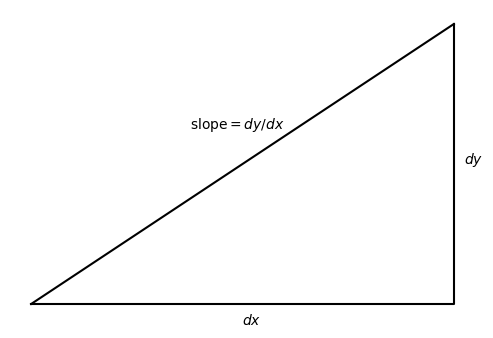

In [4]:
dx = dy = 1
points = [(0, 0), (dx, 0), (dy, 1)] # left, right, top coords
plot_right_triangle(points, base_label='$dx$', height_label='$dy$', hyp_label='slope$=dy/dx$', offset=0.05)

So the derivative is some kind of slope of a triangle with base $dx$ and height $dy$, but how does that relate to the function itself, $y=f(x)$? Since the derivative itself depends on $x$, the slope will too. But which slope are we talking about? It turns out the slope the derivative represents is the slope *tangent* to the function at a point $x=x_0$. That is, the derivative of $y=f(x)$ at $x=x_0$ is the slope of the *tangent line* defined by the affine function
$$y = y_0 + \frac{dy}{dx}\bigg|_{x=x_0}(x - x_0).$$

Here's an example. I'll plot the function $y=x^2$ and its *tangent* at a point $x_0=2$ on the x-axis. The corresponding $y$ at $x=2$ is just $y_0=x_0^2=4$. As we derived above, its derivative (and hence slope) at $x_0=2$ is
$$\frac{dy}{dx}\bigg|_{x=2}=2(2)=4,$$
so the equation for the tangent line of $y=x^2$ at $x_0=2$ is
$$y = 4 + 4(x - 2) = 4x -4.$$

In the code below, the tangent line calculation is done with the line
```
y_tangent = y0 + dydx0 * (x - x0).
```
I'll plot the function itself along with its tangent line at `x0 = 2`, choosing a small `dx = 1e-5`.

Feel free to adjust the value of `x0` observe how the slope changes with the value you pick. In all cases, the line should hug the curve of the function and stay tangent to it. If you're used to numpy already you can play around with the function itself as well by changing the line `y = x ** 2` to any other function you want.

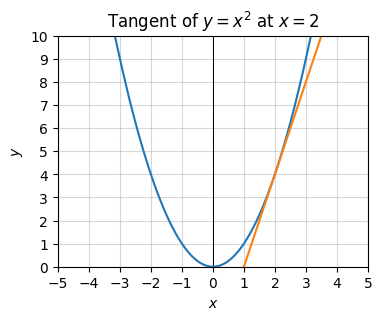

In [5]:
x0 = 2
dx = 1e-5

x = np.arange(-10, 10, 0.1)
y = x ** 2

x_nudged = x + dx
y_nudged = x_nudged ** 2
dy = y_nudged - y

idx_x_eq_x0 = np.where(np.abs(x - x0) < dx)[0].item()
y0, dydx0 = y[idx_x_eq_x0], (dy / dx)[idx_x_eq_x0].flatten()

y_tangent = y0 + dydx0 * (x - x0)

plot_function(x, (y, y_tangent), (-5, 5), (0, 10), title=f'Tangent of $y=x^2$ at $x={x0}$')

Generally speaking, if the derivative $\frac{dy}{dx}$ at a point is positive the slope will slant towards the right. If the derivative at that point is negative the slope will slant towards the left. And if it's zero at that point the slope there will be flat, i.e. horizontal. This last fact turns out to be very important as we'll see soon.

The second derivative $\frac{d^2 y}{dx^2}$ has a geometric interpretation as well but it's harder to visualize. The second derivative of a function captures information about the *curvature* of the function, i.e. how much a function bends at each point. If a given function is really step at a point its second derivative will be high. If it's really flat at a point its second derivative will be small.

### Differentiation Rules

Derivatives and differentials obey several laws that I'll mostly just state below. For most people it's not really that important to know all of these in machine learning, especially since we'll use autodifferentiation to calculate them for us. If you're more into research though it may behoove you to know these in more depth.

To save space I'll state all these rules in differential form. To get the derivative versions just divide both sides by $dx$.

Derivative Rules:
- Additive Rule: $d(u + v) = du + dv$ for any two functions $u=f(x)$ and $v=g(x)$,
- Constant Rule: $d(cy) = c dy$ for any constant $c$,
- Product Rule: $d(uv)=udv + vdu$ for any two functions $u=f(x)$ and $v=g(x)$,
- Quotient Rule: $v^2 d(\frac{u}{v}) = vdu-udv$ for any two functions $u=f(x)$ and $v=g(x)$,
- Chain Rule: $dy = \frac{dy}{dz} dz$ for any compositional function $y=f(z)$ and $z=g(x)$, i.e. $y=f(g(x))$.

**Aside:** You can actually pretty easily derive these rules using infinitesimals. For example, here's a derivation of the product rule $d(uv) = udv - vdu$. We'll use the fact that the product function $(fg)(x) = f(x)g(x)$.
$$
\begin{align}
d(uv) &= (fg)(x+dx) - (fg)(x) \\
&= f(x+dx)g(x+dx) - f(x)g(x) \\
&= (u + du)(v + dv) - uv \\
&= udv + vdu + dudv \\
&\approx udv + vdu.
\end{align}
$$

For the sake of completeness I'll list the differentials of a few common classes of functions as well. You don't need to memorize these either. Again, get the derivative forms by dividing by $dx$.

Some Common Derivatives:
- $d(c) = 0$ for any constant $c$,
- $d(x^n) = nx^{n-1}dx$ for any real number $n \neq 0$
- $d(e^x) = e^xdx$,
- $d(\log(x)) = \frac{1}{x}dx$,
- $d(\sin(x)) = \cos(x)dx$,
- $d(\cos(x)) = -\sin(x)dx$,
- $d(\text{sigmoid}(x)) = \text{sigmoid}(x)\big(1-\text{sigmoid}(x)\big)dx$,
- $d(\tanh(x)) = \big(1 - \tanh^2(x)\big)dx$.

### WolframAlpha [Optional]

While python has a library called [SymPy](https://www.sympy.org/en/index.html) that can calculate derivatives and other math symbolically, my favorite tool for symbolic math is [WolframAlpha](https://www.wolframalpha.com/). In WolframAlpha you can just type what you want to take the derivative of in more or less natural language and it'll usually figure out what you mean and instantly give you the right answer. 

Most of the time it's usually easier to just go to their website and type your query in the search bar there. Since I want to keep everything inside this notebook though I'll use their API to show a couple of examples. Note that WolframAlpha can do *far* more than just calculate derivatives. See their documentation for more info.

Here are the derivatives of a couple of functions I typed in.

In [6]:
query_wolfram_alpha('d/dx e^x + x^2 - log(x)')

'd/dx(e^x + x^2 - log(x)) = 2 x + e^x - 1/x'

In [7]:
query_wolfram_alpha('d/dx (x^5 - 5*sin(x)) / (e^x + log(x))')

'd/dx((x^5 - 5 sin(x))/(e^x + log(x))) = (5 (e^x + log(x)) (x^4 - cos(x)) - (e^x + 1/x) (x^5 - 5 sin(x)))/(e^x + log(x))^2'

If you want to play with WolframAlpha it's probably easier to just go to their webpage via the above link. If you want to run these queries in the notebook like I did, you'll need to create an account and register for a free API key [here](https://products.wolframalpha.com/api). You'll also need to `pip install wolframalpha` in your environment and be connected to the internet when you make your queries.

### Partial Differentiation and Gradients

Just as we could take differentials or derivatives of *univariate* functions like $y=f(x)$, we can also do so for *multivariate* functions like $z=f(x,y)$. The only difference is that we can take differentials for many inputs variables, not just one.

### Differentiation in 2 Dimensions

Suppose $z=f(x,y)$ and we want to ask the question, how does $z$ change if we change $x$ by an amount $dx$, holding $y$ constant? Evidently it would be $z + dz = f(x+dx, y)$. If we pretend $y$ is constant, this would mean
$$dz = f(x+dx, y) - f(x, y).$$
Dividing both sides by $dx$ we'd get *something* like a derivative. But it's not *the* derivative since we're only changing $x$ and fixing $y$. For this reason it's called the **partial derivative** of $z$ with respect to $x$, and typically written with funny $\partial$ symbols instead of $d$ symbols,
$$\frac{\partial z}{\partial x} = \frac{f(x+dx, y) - f(x, y)}{dx}.$$

Similarly, we can ask the dual question, how does $z$ change if we change $y$ by an amount $dy$, holding $x$ constant? By the same logic, we'd get
$$dz = f(x, y + dy) - f(x, y),$$
and dividing by $dy$ would give the partial derivative of $z$ with respect to $y$,
$$\frac{\partial z}{\partial y} = \frac{f(x, y + dy) - f(x, y)}{dy}.$$

But what about *the* derivative. We want to know how $z$ changes if we change $x$ and $y$ arbitrarily, not if we hold one of them constant. It turns out in this case that $dz$ is given by the equation
$$dz = \frac{\partial z}{\partial x} dx + \frac{\partial z}{\partial y} dy.$$
This equation is called the **chain rule**. It tells us everything we need to know about how $z$ changes when either $x$ or $y$ is nudged by some small amount. The amount that $z$ gets nudged is $dz$, called the **total differential**.

It's interesting to write this formula as a dot product of two vectors. Evidently, if we define two vectors as follows,
$$
\frac{dz}{d\mathbf{x}}=\big(\frac{\partial z}{\partial x}, \frac{\partial z}{\partial y}\big), \\
d\mathbf{x} = (dx, dy),
$$
then the chain rule would say
$$dz = \frac{dz}{d\mathbf{x}} \cdot d\mathbf{x}.$$
This looks just like the equation for the ordinary derivative, except there's a dot product of vectors here. 

The vector $\frac{dz}{d\mathbf{x}}$ that looks like the ordinary derivative is usually called the **gradient** of $z$, sometimes also written $\nabla z$. Unlike the ordinary derivative the gradient is always a vector whose elements are its partial derivatives.

Let's look at our favorite 2D example function $z=x^2+y^2$. Recall this function has a surface that looks like a bowl.

In [8]:
x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)
f = lambda x, y: x**2 + y**2

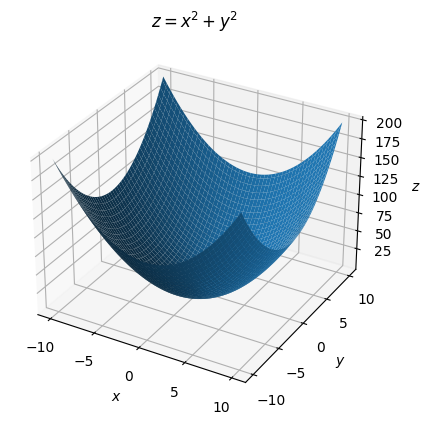

In [9]:
plot_3d(x, y, f, title='$z=x^2+y^2$')

Suppose we treat $y$ as constant, say $y=2$. If we nudge $x$ to $x+dx$, then $z$ would get nudged to
$$z+dz = f(x+dx,y) = (x+dx)^2 + y^2 = (x^2 + 2xdx + dx^2) + y^2 \approx z + 2xdx.$$
That is,
$$\frac{\partial z}{\partial x} = 2x.$$
This is exactly what we got before in the 1D case with $f(x)=x^2$. This makes since. By treating $y$ as constant we're effectively pretending it's not there in the calculation, which makes it act like we're taking the 1D derivative $z=x^2$.

Since $z=x^2+y^2$ is symmetric in $x$ and $y$, the exact same argument above would show
$$\frac{\partial z}{\partial y} = 2y.$$
The gradient vector would thus be
$$\frac{dz}{d\mathbf{x}} = (2x, 2y) = 2\mathbf{x}, \quad \text{where }\mathbf{x} = (x,y).$$
The gradient looks exactly like the 1D solution as well, except with a vector $\mathbf{x}$ instead.

In [10]:
x0 = y0 = 1
dx = dy = 1e-5

dzdx0 = (f(x0 + dx, y0) - f(x0, y0)) / dx
dzdy0 = (f(x0, y0 + dy) - f(x0, y0)) / dy

grad = [dzdx0, dzdy0]
grad

[2.00001000001393, 2.00001000001393]

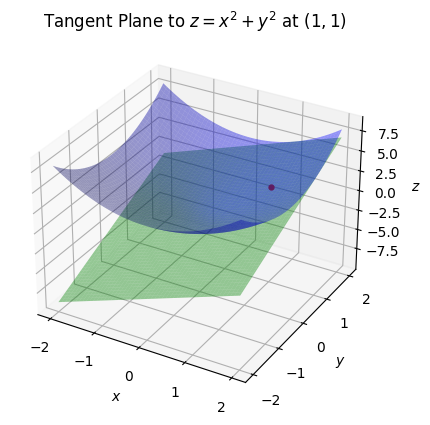

In [11]:
f = lambda x, y: x**2 + y**2
f_tangent = lambda x, y: 2 * (x + y) - 1

x = np.linspace(-2, 2, 100)
y = np.linspace(-2, 2, 100)
point = [1, 1]
plot_tangent_plane(x, y, f, f_tangent, point, title='Tangent Plane to $z=x^2+y^2$ at $(1,1)$')

### Differentiation in $n$ Dimensions

Similarly, we can define all of these quantities for any n-dimensional multivariate function $z=f(x_1,x_2,\cdots,x_n).$ The partial derivative of $z$ with respect to some $x_i$ is
$$\frac{\partial z}{\partial x_i} = \frac{f(x_1,x_2,\cdots,x_i+dx_i,\cdots,x_n) - f(x_1,x_2,\cdots,x_i,\cdots,x_n)}{dx_i}.$$
That is, it's the derivative of $z$ with respect to $x_i$ where all other inputs $x_j \neq x_i$ are held constant. The chain rule for the total differential $dz$ naturally extends by adding a term for each input $x_i$,
$$dz = \sum_{i=1}^n \frac{\partial z}{\partial x_i} dx_i = \frac{\partial z}{\partial x_1} dx_1 + \frac{\partial z}{\partial x_2} dx_2 + \cdots + \frac{\partial z}{\partial x_n} dx_n.$$
We can again write the chain rule as a dot product of $n$ dimensional vectors
$$
\frac{dz}{d\mathbf{x}}=\bigg(\frac{\partial z}{\partial x_1}, \frac{\partial z}{\partial x_2},\cdots,\frac{\partial z}{\partial x_n} \bigg), \\
d\mathbf{x} = (dx_1, dx_2,\cdots,dx_n), \\
dz = \frac{dz}{d\mathbf{x}} \cdot d\mathbf{x}.
$$

In [12]:
def numerical_gradient(f, x0, dx):
    return (f(x0 + dx) - f(x0)) / dx

f = lambda x: np.sum(x ** 2)
x0 = np.ones(100)
dx = x0 * 1e-5
grad = numerical_gradient(f, x0, dx)
print(grad.shape)
grad

(100,)


array([200.001, 200.001, 200.001, 200.001, 200.001, 200.001, 200.001,
       200.001, 200.001, 200.001, 200.001, 200.001, 200.001, 200.001,
       200.001, 200.001, 200.001, 200.001, 200.001, 200.001, 200.001,
       200.001, 200.001, 200.001, 200.001, 200.001, 200.001, 200.001,
       200.001, 200.001, 200.001, 200.001, 200.001, 200.001, 200.001,
       200.001, 200.001, 200.001, 200.001, 200.001, 200.001, 200.001,
       200.001, 200.001, 200.001, 200.001, 200.001, 200.001, 200.001,
       200.001, 200.001, 200.001, 200.001, 200.001, 200.001, 200.001,
       200.001, 200.001, 200.001, 200.001, 200.001, 200.001, 200.001,
       200.001, 200.001, 200.001, 200.001, 200.001, 200.001, 200.001,
       200.001, 200.001, 200.001, 200.001, 200.001, 200.001, 200.001,
       200.001, 200.001, 200.001, 200.001, 200.001, 200.001, 200.001,
       200.001, 200.001, 200.001, 200.001, 200.001, 200.001, 200.001,
       200.001, 200.001, 200.001, 200.001, 200.001, 200.001, 200.001,
       200.001, 200.

## Optimization

For the purposes of machine learning, by far the most important application of differentiation is to optimization. **Optimization** is the problem of finding the "best" values to plug into a given function. Usually be "best" we mean finding either the minimum value of a loss function, which is a function that measures how well a model's predictions agree with the data it sees. Finding the minimum value of the loss function essentially means we've found the best weights for our model, the ones that give the highest accuracy on the data.

An interesting fact is that, at least for reasonably smooth functions, the minimum (and maximum) values will *always* be at a point where the derivative or gradient is zero. To see why, consider our tangent line plot of $y=x^2$ above. What happens if we set our point of interest to be `x0 = 0`? Scroll back up and try it. You'll see that at that point the slope is horizontal, i.e. the derivative at that point it zero.

More formally, suppose we have a function $y=f(x)$. Suppose $x^*$ is a value that minimizes $f(x)$, called the **argmin** of $f(x)$. Then
$$\frac{dy}{dx}\bigg|_{x=x^*}=0.$$


Another useful way to state the same fact is to think in terms of infinitesimals: At $x^*$, any infinitesimal perturbations $dx$ don't change the function at all to first order: $f(x^*+dx) = f(x^*)$. That is, $dy=0$.

This fact is also true for maxima, but also any points where the derivative is zero. These special points of a function are called its **stationary points**.

The same thing is true of multivariate functions too, except using gradients instead of derivatives. If $\mathbf{x^*}$ is a vector that minimizes the function $z=f(\mathbf{x})=f(x_1,\cdots,x_n)$, then
$$\frac{dz}{d\mathbf{x}}\bigg|_{\mathbf{x}=\mathbf{x^*}}=\mathbf{0}.$$
Equivalently, any infinitesimal perturbation $d\mathbf{x}$ about $\mathbf{x}^*$ won't change the function to first order, i.e. 
$$dz = f(\mathbf{x}^* + d\mathbf{x}) - f(\mathbf{x}^*) = 0.$$

This fact suggests that if we're interested in writing a function to find the minimum $\mathbf{x}^*$ of $z=f(\mathbf{x})$, one way to do it might be to use the gradient as an indicator of how far away we're are. Since the gradient will be zero at the minimum, the length (i.e. the 2-norm) of the gradient vector can tell us if we're getting closer. Moreover, since the gradient vector at a point $\mathbf{x}$ always points in the direction of steepest *ascent*, we should be able to point in the direction of steepest *descent* by using its negative. This is the entire idea behind gradient descent.

Pick a random starting point $\mathbf{x}_0$. Compute the gradient at that point. Take a step toward a new point $\mathbf{x}_1$ by following the gradient,
$$\mathbf{x}_1 = \mathbf{x}_0 - \alpha \frac{dz}{d\mathbf{x}}\bigg|_{\mathbf{x}_0}.$$
The scalar $\alpha$ is a step size parameter that determines how large of a step to take at each step. In machine learning $\alpha$ is called the **learning rate**. When the learning rate is large, larger step sizes will be taken. When it's small, smaller step sizes will be taken.

Now let's take another step to get to a new point $\mathbf{x}_2$,
$$\mathbf{x}_2 = \mathbf{x}_1 - \alpha \frac{dz}{d\mathbf{x}}\bigg|_{\mathbf{x}_1}.$$
Keep doing this over and over. When at a point $\mathbf{x}_n$, get to $\mathbf{x}_{n+1}$ via
$$\mathbf{x}_{n+1} = \mathbf{x}_n - \alpha \frac{dz}{d\mathbf{x}}\bigg|_{\mathbf{x}_n}.$$

## Integration [Optional]

### One-Dimensional Integrals

The other half of calculus is essentially about summing up small things to get big things. By small things of course we again mean infinitesimals. Suppose we have a bunch of infinitesimals $\varepsilon_1, \varepsilon_2, \cdots, \varepsilon_n$. Like any other number we can add them together to get a new infinitesimal
$$\varepsilon = \varepsilon_1 + \varepsilon_2 + \cdots + \varepsilon_n.$$

Take $\varepsilon=10^{-200}$ for example. We showed that as far as a computer is concerned $\varepsilon^2=0$. But what happens if we instead start adding up a bunch of $\varepsilon$? Suppose we add up $\varepsilon$ $N$ times. If $N$ is any reasonably sized finite number, a number like $N=1000$, $\varepsilon$ will still be infinitesimal. But what about if we make $N$ *huge*, infinite for practical purposes, say $N=10^{200}$? Then we just get $N\varepsilon=1$, a finite number.

In [13]:
epsilon = 1e-200
N = 1000
N * epsilon, (N * epsilon) ** 2

(1e-197, 0.0)

In [14]:
epsilon = 1e-200
N = 1e200
N * epsilon, (N * epsilon) ** 2

(1.0, 1.0)

If we add up only a *finite* number of infinitesimals we'll again get an infinitesimal, so in the case above $\varepsilon$ is again an infinitesimal assuming $n$ is finite. But if we add up *infinitely* many infinitesimals we'll get something finite. This is the idea behind integration.

Let's do an example. Suppose for whatever reason we're interested in the area bounded by the curve $y=\sqrt{x}$ and the $x$ axis, say from $x=0$ to $x=10$. How would we calculate this? One idea might be to approximate the function with rectangles of width $dx=1$ and height $f(x)$, where $x$ is taken at each integer value $x=1,2,3,\cdots,10$. Then approximately speaking the area would just be the sum of all these rectangles:

$$
\begin{align}
\text{area} &\approx f(1)dx + f(2)dx + f(3)dx + \cdots + f(10)dx \\
&= \big(f(1) + f(2) + f(3) + \cdots + f(10)\big)\cdot 1 \\
&= \sqrt{1} + \sqrt{2} + \sqrt{3} + \cdots + \sqrt{10} \\
&\approx 22.468
\end{align}
$$

Approximate Area: nan


/Users/rkingery/repos/ml-book/notebooks/utils.py:182: RuntimeWarning: invalid value encountered in sqrt
  y_rect = np.sqrt(x_rect + dx / 2)


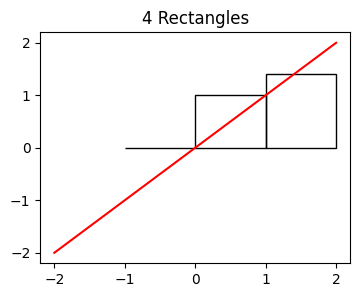

In [15]:
plot_area_under_curve(x, y, dx=1.)

But there's an error in this area estimate. You can tell by looking at the rectangles in the plot. They are actually *overestimating* the area under the curve. The exact answer turns out to be 
$$\text{area} = \frac{20}{3}\sqrt{10} \approx 21.082.$$

How can we improve this estimate? Use more rectangles! Our problem was that the rectangles we used were too coarse. What we need to do is make $dx$ smaller while at the same time making the number of rectangles used bigger in proportion. Let's try using 50 rectangles of width $dx=0.2$ instead and see how much the result improves.

Approximate Area: nan


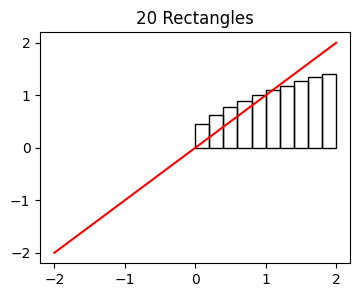

In [16]:
plot_area_under_curve(x, y, dx=0.2)

It looks better. We're at $21.380$ now. Still overestimating the true area, but not by as much. As we make $dx$ smaller and smaller, and $N$ bigger and bigger, this estimate will get better and better.

More generally, suppose $N$ is the number or rectangles. We'll take the heights of the function at each equal length point $x_1,x_2,\cdots,x_N$, each of width $dx$. Then
$$\text{area} \approx f(x_1)dx + f(x_2)dx + f(x_3)dx + \cdots + f(x_N)dx.$$
It's annoying to write out these sums like this. We can write it in compact summation notation as
$$ \text{area} \approx \sum_{n=1}^{N} f(x_n) dx.$$

If we keep making these rectangles smaller and smaller until $dx$ is infinitesimal and the number or rectangles is infinitely large, we'll get the *exact* area. Even though it's *still* a sum, in this situation we historically use a different symbol, $\int$, a long S that looks like the S in "sum". It basically means the same as the sum $\Sigma$, except it's understood that we're summing over infinitely many infinitesimal terms $f(x)dx$,
$$\text{area} = \int_0^{10} f(x) dx.$$
The right-hand side is called the (definite) **integral** of $y=f(x)$, read as "the integral of $f(x)$ from $x=0$ to $x=10$". The process of actually calculating an integral is called **integration**.

Let's try to calculate these areas using smaller and smaller rectangles and see how close we can get to the exact answer. To do this, I'll define a lambda function for $f(x)=\sqrt{x}$, and use a loop to calculate the area for successively smaller values of $dx$. Note $N$ follows from the choice of $dx$ since we must have $N=\frac{b-a}{dx}$, which in this case is just $N=\frac{10-0}{dx}$.

In [17]:
f = lambda x: np.sqrt(x)

for dx in [1, 0.1, 0.01, 0.001, 0.0001]:
    N = int(10 / dx)
    xs = np.cumsum(dx * np.ones(N))
    area = np.sum([f(x)*dx for x in xs])
    print(f'N = {N:6d} \t dx = {dx:8.4f} \t area = {area:4f}')

N =     10 	 dx =   1.0000 	 area = 22.468278
N =    100 	 dx =   0.1000 	 area = 21.233523
N =   1000 	 dx =   0.0100 	 area = 21.097456
N =  10000 	 dx =   0.0010 	 area = 21.083426
N = 100000 	 dx =   0.0001 	 area = 21.082009


It looks like if we want to get the correct answer $21.082$ to 3 decimal places we'd need to use $N=100,000$ rectangles of width $dx=10^{-4}$. In practice, that's pretty horrible. There are better ways to actually calculate these integrals numerically on a computer than just using the above definition (look up [Simpson's Rule](https://en.wikipedia.org/wiki/Simpson%27s_rule) for example), but these aren't really important to know for machine learning.

For an arbitrary function $y=f(x)$, the integral from a left-hand point $x=a$ to a right-hand point $x=b$ is given similarly by
$$\int_a^b f(x) dx = \sum_{n=1}^{N} f(x_n) dx,$$
where $dx$ is taken to be infinitesimal and $N$ to be infinitely large in proportion, so that $x_n-x_{n-1}=dx$ for each $n=1,\cdots,N$. That is, the integral is defined as the sum of infinitely small non-overlapping rectangles under the curve $f(x)$, each of width $dx$ and height $f(x_n)$.

It's not at all clear from this definition how we'd get the *exact* answer $\frac{20}{3}\sqrt{10}$ shown above. We can get to it approximately by summing rectangles, but to actually be able to *calculate* the exact value we'd need a few integral rules. I won't do this though since you don't really need to know how to do that in machine learning. I have to draw the line somewhere or this lesson will turn into a book in its own right.

If you want some form of proof though that the answer I gave is exact, you can ask WolframAlpha with the following query. Provided an integral can be evaluated symbolically (they can't always), WolframAlpha will usually do it.

In [18]:
query_wolfram_alpha('integral sqrt(x) dx from 0 to 10')

'integral_0^10 sqrt(x)dx = (20 sqrt(10))/3≈21.082'

### Higher-Dimensional Integrals

I'll end this optional section by *briefly* mentioning that we can also take integrals of multivariate functions like $z=f(x,y)$. The problem we run into is what kind of thing is it we want to integrate? Do we want the *volume* under the surface? The area of the surface itself? Etc. Probably the only one worth knowing about in machine learning is the first definition, calculating the volume under a surface.

The idea of calculating a volume integral is to approximate the area under a surface not with rectangles, but with $N\cdot M$ rectangular prisms with base area $dx \cdot dy$ and height $z=f(x,y)$,
$$\text{volume} = \int_R f(x,y) dxdy = \sum_{n=1}^N \sum_{m=1}^M f(x_n,y_m) dxdy.$$
Rather than integrate from one endpoint $a$ to another endpoint $b$, we now have to integrate over a 2D region in the xy-plane that I'll call $R$. That region could be a rectangle, in which case we'd have
$$\text{volume} = \int_a^b \int_c^d f(x,y) dxdy.$$
Usually $R$ won't be a rectangle, but some arbitrary shape. It could even be infinite in one or more directions.

Though impossible to visualize, we can readily extend this same idea to $n$ dimensional functions $z=f(x_1,\cdots,x_n)$. In this case we're calculating the $n$ dimensional *hypervolume* under the $n-1$ dimensional *manifold* $z=f(x_1,\cdots,x_n)$. The hyper-rectangles would now have base hypervolume $dx_1dx_2\cdots dx_n$ and height $z=f(x_1,\cdots,x_n)$, so
$$\text{hypervolume} = \int_R f(x_1,\cdots,x_n) dx_1dx_2\cdots dx_n = \sum_{\text{all hyper-rectangles}} f(x_1,\cdots,x_n) dx_1dx_2\cdots dx_n.$$

The only important place that integrals like this come up in machine learning is in the definition of continuous probability distributions like the Gaussian or Uniform distributions. We'll cover these distributions in the next lesson. Don't worry about the integrals you see though. Just think of them as calculating volumes under surfaces using infinitely thin rectangular prisms.